In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
business = pd.read_json("../data/yelp_academic_dataset_business.json", lines=True)

In [3]:
checkin = pd.read_json("../data/yelp_academic_dataset_checkin.json", lines=True)
review = pd.read_json("../data/yelp_academic_dataset_review.json", lines=True)
user = pd.read_json("../data/yelp_academic_dataset_user.json", lines=True)

In [4]:
def pick(row):
    words = str(row).split(',')
    words = [word.lstrip() for word in words]
    return words

business['category'] = business['categories'].apply(pick)

In [5]:
business = business[~business['categories'].isna()]

In [6]:
business

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state,category
0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,None,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ,"[Golf, Active Life]"
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON,"[Specialty Food, Restaurants, Dim Sum, Importe..."
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC,"[Sushi Bars, Restaurants, Japanese]"
3,"15655 W Roosevelt St, Ste 237",None,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ,"[Insurance, Financial Services]"
4,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC,"[Plumbing, Shopping, Local Services, Home Serv..."
5,"Credit Valley Town Plaza, F2 - 6045 Creditview Rd","{'BusinessParking': '{'garage': False, 'street...",68dUKd8_8liJ7in4aWOSEA,"Shipping Centers, Couriers & Delivery Services...",Mississauga,"{'Monday': '9:0-19:0', 'Tuesday': '9:0-20:0', ...",1,43.599475,-79.711584,The UPS Store,L5V 0B1,3,2.5,ON,"[Shipping Centers, Couriers & Delivery Service..."
6,20 Douglas Woods Drive Southeast,"{'RestaurantsPriceRange2': '2', 'BusinessParki...",5JucpCfHZltJh5r1JabjDg,"Beauty & Spas, Hair Salons",Calgary,None,1,50.943646,-114.001828,Edgeworxx Studio,T2Z 1K4,7,3.5,AB,"[Beauty & Spas, Hair Salons]"
7,"4545 E Tropicana Rd Ste 8, Tropicana","{'RestaurantsPriceRange2': '3', 'GoodForKids':...",gbQN7vr_caG_A1ugSmGhWg,"Hair Salons, Hair Stylists, Barbers, Men's Hai...",Las Vegas,"{'Monday': '10:0-19:0', 'Tuesday': '10:0-19:0'...",1,36.099872,-115.074574,Supercuts,89121,3,3.5,NV,"[Hair Salons, Hair Stylists, Barbers, Men's Ha..."
8,5940 W Union Hills Dr,"{'RestaurantsPriceRange2': '2', 'ByAppointment...",Y6iyemLX_oylRpnr38vgMA,"Nail Salons, Beauty & Spas, Day Spas",Glendale,"{'Tuesday': '12:0-18:0', 'Wednesday': '10:0-18...",0,33.654815,-112.188568,Vita Bella Fine Day Spa,85308,8,5.0,AZ,"[Nail Salons, Beauty & Spas, Day Spas]"
9,21689 Lorain Rd,"{'ByAppointmentOnly': 'False', 'BusinessAccept...",4GBVPIYRvzGh4K4TkRQ_rw,"Beauty & Spas, Nail Salons, Day Spas, Massage",Fairview Park,"{'Tuesday': '9:0-21:0', 'Wednesday': '9:0-21:0...",1,41.440825,-81.854097,Options Salon & Spa,44126,8,4.5,OH,"[Beauty & Spas, Nail Salons, Day Spas, Massage]"


In [7]:
def contains(df):
    keywords = ['Restaurants', 'restaurants', 'Food', 'food']
    
    def filter_keywords(row):
        words = [word for word in row for keyword in keywords if keyword in word]
        if len(words) == 0:
            return None
        else:
            return row
        
    return filter_keywords(df)

In [8]:
row = ['Korean', 'Japanese', 'Asian Fusion', 'Restaurants']
print(contains(row))

['Korean', 'Japanese', 'Asian Fusion', 'Restaurants']


In [9]:
business['category'] = business['category'].apply(contains)

In [10]:
business = business.dropna(subset=['category'])

In [11]:
business.to_json("../data/restaurant/yelp_academic_dataset_business.json")

In [ ]:
review_merged = pd.merge(business['business_id'], review, on='business_id', how='left')

In [79]:
review_merged

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,QXAEGFB4oINsVuTFxEYKFQ,0.0,2017-01-27 21:54:30,2.0,6W0MQHmasK0IsaoDo4bmkw,3.0,My girlfriend and I went for dinner at Emerald...,3.0,2K62MJ4CJ19L8Tp5pRfjfQ
1,QXAEGFB4oINsVuTFxEYKFQ,0.0,2013-06-24 23:11:30,0.0,BeeBfUxvzD4qNX4HxrgA5g,3.0,We've always been there on a Sunday so we were...,0.0,A0kENtCCoVT3m7T35zb2Vg
2,QXAEGFB4oINsVuTFxEYKFQ,0.0,2016-01-04 12:59:22,0.0,A1D2kUnZ0HTroFreAheNSg,3.0,"***No automatic doors, not baby friendly!*** I...",0.0,SuOLY03LW5ZcnynKhbTydA
3,QXAEGFB4oINsVuTFxEYKFQ,0.0,2014-05-09 02:38:43,0.0,2pf45Stf-pNew-xgTababQ,1.0,"Horrible service,\nI went there tonight with m...",1.0,lymyUak6KNcNKoDbK87MiQ
4,QXAEGFB4oINsVuTFxEYKFQ,2.0,2011-03-21 14:39:55,1.0,RHhlmL07evgAdPaXQV8Omg,4.0,One of the gauges of a good Chinese restaurant...,2.0,6vU0I5XgCv9OQHZ76rV6qw
5,QXAEGFB4oINsVuTFxEYKFQ,0.0,2016-08-13 20:31:21,0.0,fhbL1BO2TCYKpoDLf-3mcg,4.0,"I've been a frequent at this place for years, ...",0.0,nyL_LfmAaf15o8aj7WHnPw
6,QXAEGFB4oINsVuTFxEYKFQ,0.0,2015-02-17 00:10:02,0.0,TD5E5NTFqgi1LPbTLlRCjQ,3.0,We chose this restaurant for our Chinese New Y...,0.0,-ga7pQvnJcMB1_pIapHQRQ
7,QXAEGFB4oINsVuTFxEYKFQ,0.0,2017-01-02 20:32:29,0.0,4Sg_ziTcrYlGO0dVyj2V3g,1.0,I went at 230 on a Monday. It was dimsum \n\nI...,2.0,agqWketq-FhYwVmRyli4jA
8,QXAEGFB4oINsVuTFxEYKFQ,1.0,2016-01-18 17:49:39,0.0,PNF0KXB9-RJMveiLvgkASw,3.0,My family and I were at Emerald yesterday duri...,0.0,02AgiiwLg_XAhkvG-wGZKQ
9,QXAEGFB4oINsVuTFxEYKFQ,0.0,2015-08-20 03:31:45,0.0,ijWqxLnjOo9LZpxOVGgCnw,4.0,"Because we are in Mississauga, I think this pl...",0.0,paYZw5wsS25IzzBZtijB8A


In [72]:
user_merged = pd.merge(review_merged['user_id'], user, on='user_id', how='left')

In [74]:
user.columns

Index(['average_stars', 'compliment_cool', 'compliment_cute',
       'compliment_funny', 'compliment_hot', 'compliment_list',
       'compliment_more', 'compliment_note', 'compliment_photos',
       'compliment_plain', 'compliment_profile', 'compliment_writer', 'cool',
       'elite', 'fans', 'friends', 'funny', 'name', 'review_count', 'useful',
       'user_id', 'yelping_since'],
      dtype='object')

In [68]:
restaurant_review = review_merged[['business_id', 'cool', 'date', 'funny', 'review_id', 'stars', 'text', 'useful', 'user_id']]
restaurant_user = user_merged

Index(['average_stars', 'compliment_cool', 'compliment_cute',
       'compliment_funny', 'compliment_hot', 'compliment_list',
       'compliment_more', 'compliment_note', 'compliment_photos',
       'compliment_plain', 'compliment_profile', 'compliment_writer', 'cool',
       'elite', 'fans', 'friends', 'funny', 'name', 'review_count', 'useful',
       'user_id', 'yelping_since'],
      dtype='object')

In [75]:
user_merged = user_merged.drop_duplicates()

In [76]:
user_merged

,user_id,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,...,compliment_writer,cool,elite,fans,friends,funny,name,review_count,useful,yelping_since
0,2K62MJ4CJ19L8Tp5pRfjfQ,3.30,5.0,0.0,5.0,0.0,0.0,0.0,1.0,1.0,...,3.0,20.0,"2017,2018",1.0,"ZJfwkdJMex21dGHfQ3YgTg, 603oDa3dGdJyfkq2RoH2Dw...",22.0,David,57.0,58.0,2014-11-27 22:36:00
1,A0kENtCCoVT3m7T35zb2Vg,3.66,5.0,0.0,5.0,5.0,0.0,2.0,6.0,1.0,...,10.0,122.0,"2016,2017,2018",9.0,"BBY1Alonk5V0OLgk_G0rNQ, TY7QgNKJEhvo1zCULlT9Rg...",86.0,Anastasia,348.0,411.0,2009-02-15 16:45:34
2,SuOLY03LW5ZcnynKhbTydA,3.72,8.0,0.0,8.0,3.0,0.0,0.0,3.0,1.0,...,10.0,85.0,"2015,2016,2017,2018",6.0,"bg2-7AvWq-vJs54NN0X-yQ, 697iJkhX1mkVF9RNhn114Q...",36.0,Jocelyn,105.0,150.0,2014-10-02 14:12:40
3,lymyUak6KNcNKoDbK87MiQ,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,,0.0,None,0.0,M,1.0,1.0,2013-02-11 01:43:54
4,6vU0I5XgCv9OQHZ76rV6qw,3.29,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,6.0,,0.0,"yUNU1KTKs4gzxBEuZWQg8Q, zHrHUdxKq7FEURYHusrtIw...",4.0,Marc,6.0,11.0,2011-03-05 23:31:39
5,nyL_LfmAaf15o8aj7WHnPw,4.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,,0.0,None,0.0,James,4.0,0.0,2016-04-28 15:29:51
6,-ga7pQvnJcMB1_pIapHQRQ,3.32,1.0,2.0,1.0,1.0,0.0,3.0,5.0,0.0,...,3.0,12.0,"2016,2017",7.0,"aE8OTrgaYpPZoRmBghRVJA, 4bxhIKz9ePWqD93UkEjnbg...",18.0,Tracy,73.0,58.0,2014-02-23 15:07:46
7,agqWketq-FhYwVmRyli4jA,3.86,1.0,0.0,1.0,1.0,0.0,0.0,3.0,0.0,...,0.0,25.0,"2016,2017,2018",3.0,"PD-UFm_hUuP-OyDKx9k9yw, oRIMLZ0lVT55IQ4Xw6gg2w...",32.0,Jennifer,73.0,79.0,2014-09-30 13:24:38
8,02AgiiwLg_XAhkvG-wGZKQ,3.64,3.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,...,5.0,19.0,"2016,2017,2018",3.0,"ATpml8FuTvxN-5J-Lc-pzw, WeVkkF5L39888IPPlRhNpg...",21.0,Jen,146.0,76.0,2015-11-28 23:08:15
9,paYZw5wsS25IzzBZtijB8A,3.23,2.0,0.0,2.0,1.0,0.0,1.0,2.0,0.0,...,0.0,34.0,"2015,2016,2017",5.0,"sv5XBhCo5zmX2yVlyshCRA, uAgHVDgtDyrewayuIWmnOA...",26.0,Kin,96.0,98.0,2014-07-30 21:15:31


In [77]:
checkin

,business_id,date
0,--1UhMGODdWsrMastO9DZw,"2016-04-26 19:49:16, 2016-08-30 18:36:57, 2016..."
1,--6MefnULPED_I942VcFNA,"2011-06-04 18:22:23, 2011-07-23 23:51:33, 2012..."
2,--7zmmkVg-IMGaXbuVd0SQ,"2014-12-29 19:25:50, 2015-01-17 01:49:14, 2015..."
3,--8LPVSo5i0Oo61X01sV9A,2016-07-08 16:43:30
4,--9QQLMTbFzLJ_oT-ON3Xw,"2010-06-26 17:39:07, 2010-08-01 20:06:21, 2010..."
5,--9e1ONYQuAa-CB_Rrw7Tw,"2010-02-08 05:56:47, 2010-02-15 04:47:42, 2010..."
6,--DaPTJW3-tB1vP-PfdTEg,"2012-06-03 17:46:09, 2012-08-04 16:19:52, 2012..."
7,--DdmeR16TRb3LsjG0ejrQ,"2012-11-02 21:26:42, 2012-11-02 22:30:43, 2012..."
8,--EF5N7P70J_UYBTPypYlA,"2018-05-25 19:52:07, 2018-09-18 16:09:44"
9,--EX4rRznJrltyn-34Jz1w,"2010-02-26 17:05:40, 2012-12-29 20:05:04, 2012..."


In [78]:
business.to_json("../data/restaurant/yelp_academic_dataset_business.json")
review_merged.to_json("../data/restaurant/yelp_academic_dataset_review.json")
user_merged.to_json("../data/restaurant/yelp_academic_dataset_user.json")

In [81]:
num_visited = review_merged['user_id'].value_counts()

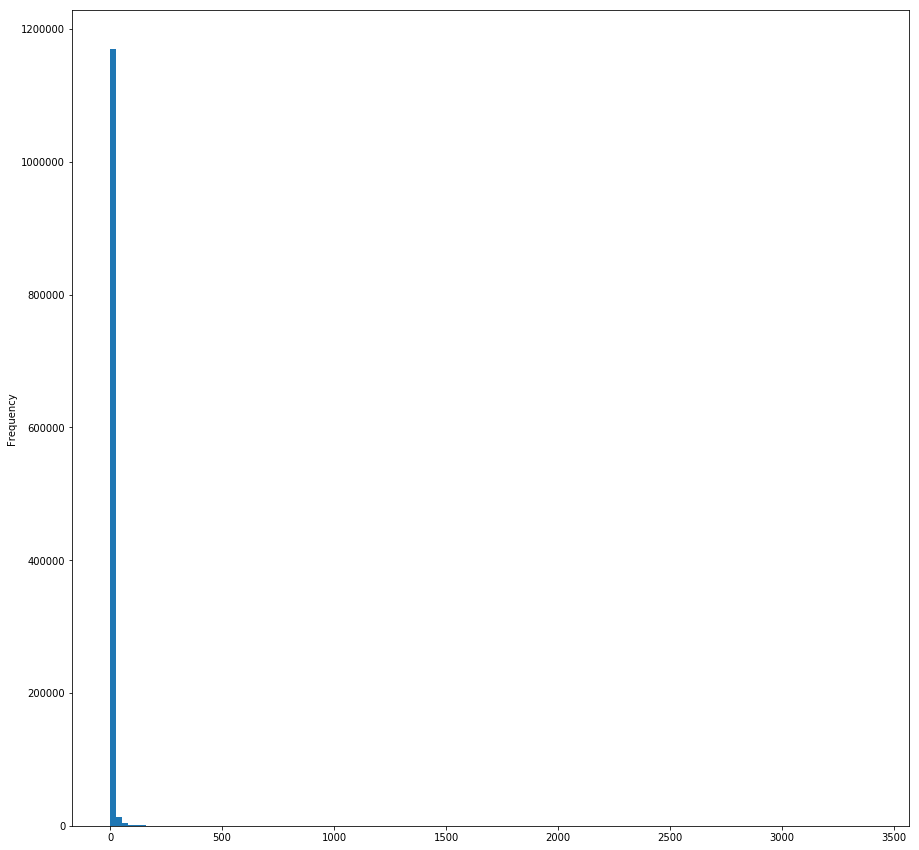

In [87]:
num_visited.plot.hist(bins=128, figsize=(15, 15))

In [88]:
num_visited.describe()

count    1.190225e+06
mean     3.848264e+00
std      1.302995e+01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      3.000000e+00
max      3.398000e+03
Name: user_id, dtype: float64

In [93]:
num_visited.quantile(0.01)

1.0

In [94]:
num_visited

CxDOIDnH8gp9KXzpBHJYXw    3398
bLbSNkLggFnqwNNzzq-Ijw    1807
ELcQDlf69kb-ihJfxZyL0A    1515
DK57YibC5ShBmqQl97CKog    1285
U4INQZOPSUaj8hMjLlZ3KA    1281
PKEzKWv_FktMm2mGPjwd0Q    1237
d_TBs6J3twMy9GChqUEXkg    1178
cMEtAiW60I5wE_vLfTxoJQ    1100
UYcmGbelzRa0Q6JqzLoguw     910
QJI9OSEn6ujRCtrX06vs1w     896
rCWrxuRC8_pfagpchtHp6A     857
3nDUQBjKyVor5wV0reJChg     854
62GNFh5FySkA3MbrQmnqvg     829
hWDybu_KvYLSdEFzGrniTw     826
n86B7IkbU20AkxlFX_5aew     810
iDlkZO2iILS8Jwfdy7DP9A     796
V-BbqKqO8anwplGRx9Q5aQ     793
U5YQX_vMl_xQy8EQDqlNQQ     769
YBT3EKUNN4IP8m4x7sGu1g     767
L8P5OWO1Jh4B2HLa1Fnbng     760
YRcaNlwQ6XXPFDXWtuMGdA     752
Lfv4hefW1VbvaC2gatTFWA     748
M9rRM6Eo5YbKLKMG5QiIPA     741
Xxvz5g67eaCr3emnkY5M6w     738
pMefTWo6gMdx8WhYSA2u3w     736
O3pSxv1SyHpY4qi4Q16KzA     727
dIIKEfOgo0KqUfGQvGikPg     724
2e5V6M4GNufEnbGJpVdCjw     718
Wu0yySWcHQ5tZ_59HNiamg     705
Q9mA60HnY87C1TW5kjAZ6Q     699
                          ... 
58fJfXieAuWcQM6Y45IPkQ       1
BXYiCiqx

In [95]:
review_merged['date'].describe()

count                 4580300
unique                4518088
top       2014-07-28 05:36:33
freq                        7
first     2004-10-12 10:13:32
last      2018-11-14 18:13:16
Name: date, dtype: object

In [98]:
test = review_merged[review_merged['date'] >= '2018-11-01']
train = review_merged[(review_merged['date'] >= '2017-01-01') & (review_merged['date'] <= '2018-10-31')]

In [100]:
train = train.sort_values('date')
test = test.sort_values('date')

In [103]:
test

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
3822441,SycXTaA4MeJZuDK4Y1owDQ,0.0,2018-11-01 00:01:01,0.0,CIcBYRC0x0CTqhtNs_8eLg,3.0,I like the food here. My favorite thing would ...,0.0,-HOiakiRKEM_4ddlsj1oTg
1562865,A-uZAD4zP3rRxb44WUGV5w,0.0,2018-11-01 00:01:23,0.0,E456zdN578ZIRNPnLNmxUg,5.0,Overall just a solid establishment. The food i...,0.0,7ZS3QxApUSCNmB7-TvPL0g
733089,GBNBXF6Z4l9Y7TNnV_r_pQ,0.0,2018-11-01 00:02:40,0.0,2kGWSsQdzllW4hcsyPRlBA,5.0,This is without a doubt my favorite pizza plac...,0.0,eIO6G3XI1aU-HpauSlKmPw
2944152,R6ogSY7AA-gl_81PhdGJaw,0.0,2018-11-01 00:02:45,0.0,xFeYPQCo8e7y5_PcM77SCA,3.0,"To avoid sounding repetitive, I found Padella ...",0.0,ibC80ThJMQ8LQjAsHtC0EQ
1736964,9_A_ka0LR0xr0EDb_nc-gg,0.0,2018-11-01 00:02:48,0.0,J__YHuXymWe6OpVgJpA6EA,2.0,"Large slice, nice amount of toppings. \n\nRall...",0.0,n7Ggo8E3_OH_jnuIFsrN6A
2854723,HczMx_z0HS_PnpdTHc3qzQ,0.0,2018-11-01 00:03:05,0.0,YuHjfVVzX6phI8um6ux4Ew,5.0,When a friend first told me that she was obses...,0.0,dWVv0BhNDM1P6raycHPbtw
670512,Sovgwq-E-n6wLqNh3X_rXg,0.0,2018-11-01 00:03:09,1.0,fruIzKEqZGyEbyryfNtyUw,5.0,"I've only been here once, but this is my favor...",2.0,n9YXtoA1gqMbNvmDGit48A
834361,K7lWdNUhCbcnEvI0NhGewg,0.0,2018-11-01 00:03:21,0.0,ZeNQLcxIqNozy1Wa0mMGWA,5.0,A beautiful casino buffet that breaks the mold...,1.0,Egv8MOT_0py6Bb5TAF56Pg
1489730,ImD9jhFSAXWlTr8EHCwv9Q,0.0,2018-11-01 00:03:31,0.0,VM_8PxH05vjKrSk8raNiVQ,1.0,The customer service in this store is nil (0) ...,0.0,vtOaanWOVF9NlhRT2tDg2Q
536681,wpDxUJ8hs3MUEH17vTR-HQ,0.0,2018-11-01 00:04:16,0.0,64KltSv6QNoejgVA9qHqNg,1.0,My Priority Pass only works on outbound flight...,0.0,BmQHfqGpHevjT031lcySmw


In [102]:
train.to_json("../data/restaurant/train_yelp_academic_dataset_review.json")
test.to_json("../data/restaurant/test_yelp_academic_dataset_review.json")

In [104]:
count_train_stars = train['stars'].value_counts()

In [105]:
count_train_stars

5.0    719879
4.0    332979
1.0    212685
3.0    172234
2.0    128966
Name: stars, dtype: int64

In [106]:
count_test_stars = test['stars'].value_counts()

In [107]:
count_test_stars

5.0    15532
4.0     6134
1.0     5120
3.0     3259
2.0     2543
Name: stars, dtype: int64

In [108]:
num_visited = train['user_id'].value_counts()
num_visited.describe()

count    582781.000000
mean          2.688391
std           6.278698
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         451.000000
Name: user_id, dtype: float64

In [114]:
num_visited.quantile(0.99)

25.0

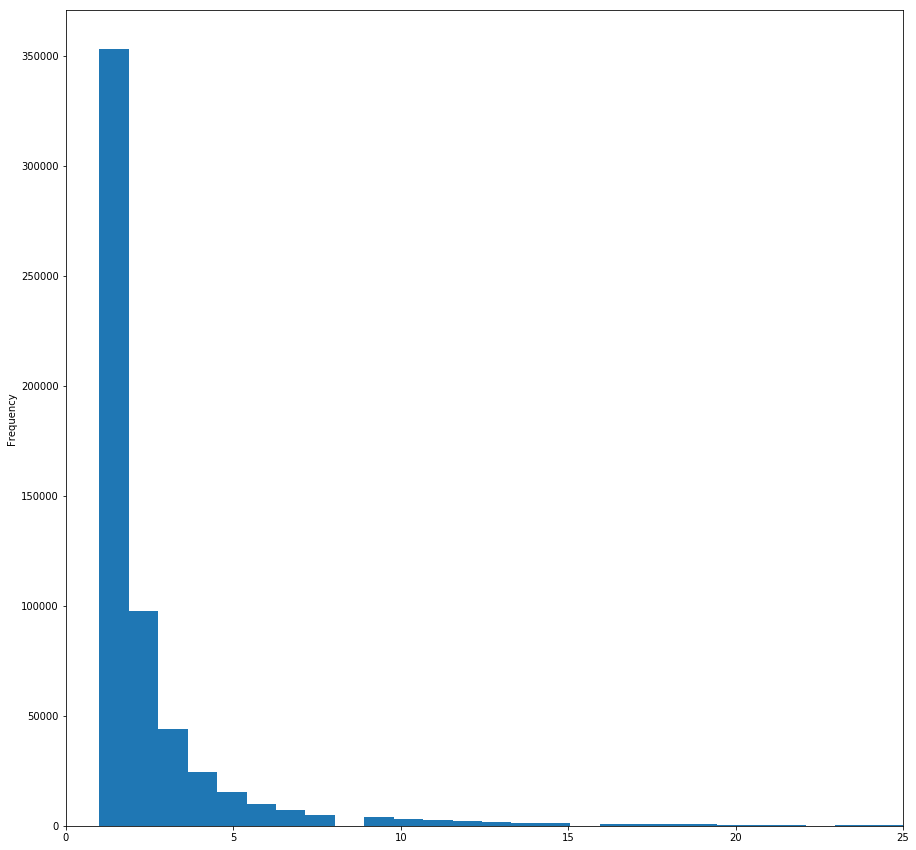

In [121]:
num_visited.plot.hist(bins=512, figsize=(15, 15), xlim=(0, 25))

In [122]:
user

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,4.03,1,0,1,2,0,0,1,0,1,...,25,"2015,2016,2017",5,"c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...",17,Rashmi,95,84,l6BmjZMeQD3rDxWUbiAiow,2013-10-08 23:11:33
1,3.63,1,0,1,1,0,0,0,0,0,...,16,,4,"kEBTgDvFX754S68FllfCaA, aB2DynOxNOJK9st2ZeGTPg...",22,Jenna,33,48,4XChL029mKr5hydo79Ljxg,2013-02-21 22:29:06
2,3.71,0,0,0,0,0,0,1,0,0,...,10,,0,"4N-HU_T32hLENLntsNKNBg, pSY2vwWLgWfGVAAiKQzMng...",8,David,16,28,bc8C_eETBWL0olvFSJJd0w,2013-10-04 00:16:10
3,4.85,0,0,0,1,0,0,0,0,2,...,14,,5,"RZ6wS38wnlXyj-OOdTzBxA, l5jxZh1KsgI8rMunm-GN6A...",4,Angela,17,30,dD0gZpBctWGdWo9WlGuhlA,2014-05-22 15:57:30
4,4.08,80,0,80,28,1,1,16,5,57,...,665,"2015,2016,2017,2018",39,"mbwrZ-RS76V1HoJ0bF_Geg, g64lOV39xSLRZO0aQQ6DeQ...",279,Nancy,361,1114,MM4RJAeH6yuaN8oZDSt0RA,2013-10-23 07:02:50
5,4.20,483,44,483,350,3,46,221,195,404,...,3048,"2015,2016,2017,2018",186,"AJxDPGVTzefy3vSHWJchvQ, TgveR4qIsr0Q7b4MJK29TA...",2424,Marilyn,214,3475,0rK89TS8xqy1wI4nYI1wfw,2011-06-23 08:05:13
6,4.39,4991,889,4991,5233,152,314,1600,428,3635,...,15319,"2006,2007,2008,2009,2010,2011,2012,2013",696,"RJQTcJVlBsJ3_Yo0JSFQQg, GWt_h78k1CBBkE1NpThGfQ...",19356,Keane,1122,13311,TEtzbpgA2BFBrC0y0sCbfw,2006-02-15 18:29:35
7,4.33,0,0,0,0,0,0,0,0,0,...,1,,0,"d1z7Xc9RG5TVBkdUPhSbAw, IgsbGFEN8NWshPNOBiNGmg...",0,Andre,6,1,KGuqerdeNhxzXZEyBaqqSw,2014-06-07 01:50:09
8,4.21,95,7,95,60,3,16,31,2,72,...,1244,"2006,2007,2008,2009,2010,2011,2012",57,"ctr_BlCf3Ogny-vLs8E9tQ, c6HT44PKCaXqzN_BdgKPCw...",693,Tanya,859,1630,T0gWkTHWRChVUe_Dn1F8nw,2005-07-20 22:38:17
9,4.53,14,2,14,13,0,3,12,5,8,...,185,,15,"N-xeG3U6rUkjVtQ0o-5YZA, wnO99pBbGqwqOoTQM25iCw...",70,Trace,124,202,NQffx45eJaeqhFcMadKUQA,2008-12-10 22:59:45


In [ ]:
def tokenize(row):
    words = str(row).split(',')
    words = [word.strip() for word in words]
    return words

